In [1]:
# Demonstration of SVM and use for character recognition task

In [2]:
# Support Vector Machines (SVM) is a powerful supervised machine learning algorithm used for classification
# and regression tasks. SVM is particularly effective in high-dimensional spaces and is often employed in tasks
# like character recognition, where the goal is to categorize handwritten characters into specific classes (e.g.,
# digits or letters). The demonstration of SVM for character recognition involves training the SVM model on a
# labeled dataset of characters and then using the trained model to predict the class of new, unseen characters.


Accuracy: 0.9814814814814815
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        47
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        60
           5       0.97      0.97      0.97        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.98      0.98      0.98        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Confusion Matrix:
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0

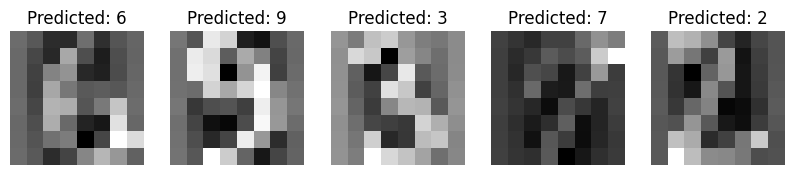

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Load the MNIST dataset
digits = load_digits()
# Flatten the images (8x8) into 64-dimensional feature vectors
X = digits.images.reshape((len(digits.images), -1))
y = digits.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the SVM model with an RBF kernel
model = SVC(kernel='rbf', gamma=0.001, C=100.0)

# 'rbf' stands for Radial Basis Function (also called Gaussian kernel).
# RBF allows the model to handle non-linear data (i.e., when classes are not separated by a straight line).
# 0.001 is small, so decision boundaries will be smoother and not too sharp.
# Penalty parameter for misclassification.
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Plot some examples with their predicted labels
plt.figure(figsize=(10, 4))
for index, (image, prediction) in enumerate(zip(X_test[:5], y_pred[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray)
    plt.title(f'Predicted: {prediction}')
    plt.axis('off')
plt.show()
